In [1]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [2]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_3rd Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 92, 92, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 128)       147584    
_________________________________________________________________
conv

In [3]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [4]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [5]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
175/175 [==============================] - 42s 242ms/step - loss: 1.7753 - categorical_accuracy: 0.2500 - val_loss: 1.5544 - val_categorical_accuracy: 0.2821
Epoch 2/400
175/175 [==============================] - 37s 214ms/step - loss: 1.4290 - categorical_accuracy: 0.3850 - val_loss: 1.4514 - val_categorical_accuracy: 0.4286
Epoch 3/400
175/175 [==============================] - 37s 214ms/step - loss: 1.2850 - categorical_accuracy: 0.4643 - val_loss: 1.2565 - val_categorical_accuracy: 0.4893
Epoch 4/400
175/175 [==============================] - 38s 215ms/step - loss: 1.2364 - categorical_accuracy: 0.4918 - val_loss: 1.2406 - val_categorical_accuracy: 0.5071
Epoch 5/400
175/175 [==============================] - 37s 214ms/step - loss: 1.1751 - categorical_accuracy: 0.5168 - val_loss: 1.1380 - val_categorical_accuracy: 0.5464
Epoch 6/400
175/175 [==============================] - 37s 213ms/step - loss: 1.1421 - categorical_acc

175/175 [==============================] - 32s 181ms/step - loss: 0.6640 - categorical_accuracy: 0.7604 - val_loss: 0.6697 - val_categorical_accuracy: 0.7464
Epoch 31/400
175/175 [==============================] - 31s 179ms/step - loss: 0.6654 - categorical_accuracy: 0.7514 - val_loss: 0.6858 - val_categorical_accuracy: 0.7357
Epoch 32/400
175/175 [==============================] - 31s 179ms/step - loss: 0.6552 - categorical_accuracy: 0.7607 - val_loss: 0.6706 - val_categorical_accuracy: 0.7321
Epoch 33/400
175/175 [==============================] - 32s 183ms/step - loss: 0.6447 - categorical_accuracy: 0.7668 - val_loss: 0.6281 - val_categorical_accuracy: 0.7607
Epoch 34/400
175/175 [==============================] - 31s 179ms/step - loss: 0.6208 - categorical_accuracy: 0.7718 - val_loss: 0.7169 - val_categorical_accuracy: 0.7500
Epoch 35/400
175/175 [==============================] - 31s 178ms/step - loss: 0.6274 - categorical_accuracy: 0.7682 - val_loss: 0.7713 - val_categorical_accu

175/175 [==============================] - 31s 177ms/step - loss: 0.4189 - categorical_accuracy: 0.8571 - val_loss: 0.6416 - val_categorical_accuracy: 0.7821
Epoch 61/400
175/175 [==============================] - 31s 180ms/step - loss: 0.4086 - categorical_accuracy: 0.8561 - val_loss: 0.5398 - val_categorical_accuracy: 0.8250
Epoch 62/400
175/175 [==============================] - 31s 179ms/step - loss: 0.4066 - categorical_accuracy: 0.8514 - val_loss: 0.4907 - val_categorical_accuracy: 0.8393
Epoch 63/400
175/175 [==============================] - 31s 176ms/step - loss: 0.3959 - categorical_accuracy: 0.8586 - val_loss: 0.6091 - val_categorical_accuracy: 0.7893
Epoch 64/400
175/175 [==============================] - 31s 176ms/step - loss: 0.3888 - categorical_accuracy: 0.8593 - val_loss: 0.5810 - val_categorical_accuracy: 0.8143
Epoch 65/400
175/175 [==============================] - 31s 176ms/step - loss: 0.3956 - categorical_accuracy: 0.8536 - val_loss: 0.6220 - val_categorical_accu

175/175 [==============================] - 31s 176ms/step - loss: 0.3041 - categorical_accuracy: 0.8979 - val_loss: 0.5827 - val_categorical_accuracy: 0.8357
Epoch 91/400
175/175 [==============================] - 31s 176ms/step - loss: 0.2873 - categorical_accuracy: 0.9029 - val_loss: 0.6504 - val_categorical_accuracy: 0.8357
Epoch 92/400
175/175 [==============================] - 31s 176ms/step - loss: 0.2452 - categorical_accuracy: 0.9186 - val_loss: 0.5136 - val_categorical_accuracy: 0.8536
Epoch 93/400
175/175 [==============================] - 31s 176ms/step - loss: 0.2833 - categorical_accuracy: 0.9057 - val_loss: 0.5141 - val_categorical_accuracy: 0.8429
Epoch 94/400
175/175 [==============================] - 31s 176ms/step - loss: 0.2410 - categorical_accuracy: 0.9196 - val_loss: 0.5090 - val_categorical_accuracy: 0.8571
Epoch 95/400
175/175 [==============================] - 31s 176ms/step - loss: 0.2826 - categorical_accuracy: 0.8986 - val_loss: 0.5657 - val_categorical_accu

Epoch 120/400
175/175 [==============================] - 31s 179ms/step - loss: 0.2068 - categorical_accuracy: 0.9339 - val_loss: 0.4377 - val_categorical_accuracy: 0.8714
Epoch 121/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1952 - categorical_accuracy: 0.9343 - val_loss: 0.4791 - val_categorical_accuracy: 0.8679
Epoch 122/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1919 - categorical_accuracy: 0.9375 - val_loss: 0.4861 - val_categorical_accuracy: 0.8607
Epoch 123/400
175/175 [==============================] - 31s 179ms/step - loss: 0.2113 - categorical_accuracy: 0.9354 - val_loss: 0.4293 - val_categorical_accuracy: 0.8643
Epoch 124/400
175/175 [==============================] - 31s 179ms/step - loss: 0.2022 - categorical_accuracy: 0.9364 - val_loss: 0.4328 - val_categorical_accuracy: 0.8714
Epoch 125/400
175/175 [==============================] - 31s 180ms/step - loss: 0.1877 - categorical_accuracy: 0.9429 - val_loss: 0.4646 - v

175/175 [==============================] - 31s 176ms/step - loss: 0.1432 - categorical_accuracy: 0.9536 - val_loss: 0.3513 - val_categorical_accuracy: 0.9071
Epoch 151/400
175/175 [==============================] - 31s 176ms/step - loss: 0.1571 - categorical_accuracy: 0.9529 - val_loss: 0.4803 - val_categorical_accuracy: 0.8607
Epoch 152/400
175/175 [==============================] - 31s 177ms/step - loss: 0.1629 - categorical_accuracy: 0.9561 - val_loss: 0.3661 - val_categorical_accuracy: 0.8857
Epoch 153/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1396 - categorical_accuracy: 0.9596 - val_loss: 0.4337 - val_categorical_accuracy: 0.9000
Epoch 154/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1520 - categorical_accuracy: 0.9518 - val_loss: 0.6113 - val_categorical_accuracy: 0.8214
Epoch 155/400
175/175 [==============================] - 31s 180ms/step - loss: 0.1510 - categorical_accuracy: 0.9575 - val_loss: 0.5136 - val_categorical

175/175 [==============================] - 31s 179ms/step - loss: 0.1178 - categorical_accuracy: 0.9639 - val_loss: 0.5330 - val_categorical_accuracy: 0.8607
Epoch 181/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1398 - categorical_accuracy: 0.9564 - val_loss: 0.4414 - val_categorical_accuracy: 0.8821
Epoch 182/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1237 - categorical_accuracy: 0.9654 - val_loss: 0.4548 - val_categorical_accuracy: 0.8821
Epoch 183/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1116 - categorical_accuracy: 0.9668 - val_loss: 0.4543 - val_categorical_accuracy: 0.8964
Epoch 184/400
175/175 [==============================] - 31s 178ms/step - loss: 0.1349 - categorical_accuracy: 0.9625 - val_loss: 0.4789 - val_categorical_accuracy: 0.8750
Epoch 185/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1085 - categorical_accuracy: 0.9696 - val_loss: 0.5021 - val_categorical

Epoch 210/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1005 - categorical_accuracy: 0.9707 - val_loss: 0.4648 - val_categorical_accuracy: 0.9000
Epoch 211/400
175/175 [==============================] - 31s 180ms/step - loss: 0.0915 - categorical_accuracy: 0.9750 - val_loss: 0.3678 - val_categorical_accuracy: 0.9071
Epoch 212/400
175/175 [==============================] - 31s 180ms/step - loss: 0.0815 - categorical_accuracy: 0.9793 - val_loss: 0.3627 - val_categorical_accuracy: 0.9071
Epoch 213/400
175/175 [==============================] - 31s 180ms/step - loss: 0.1126 - categorical_accuracy: 0.9668 - val_loss: 0.4213 - val_categorical_accuracy: 0.8893
Epoch 214/400
175/175 [==============================] - 31s 178ms/step - loss: 0.1065 - categorical_accuracy: 0.9718 - val_loss: 0.3943 - val_categorical_accuracy: 0.8964
Epoch 215/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1201 - categorical_accuracy: 0.9675 - val_loss: 0.4160 - v

Epoch 240/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0906 - categorical_accuracy: 0.9761 - val_loss: 0.5970 - val_categorical_accuracy: 0.8857
Epoch 241/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0754 - categorical_accuracy: 0.9807 - val_loss: 0.4475 - val_categorical_accuracy: 0.9000
Epoch 242/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0815 - categorical_accuracy: 0.9779 - val_loss: 0.4534 - val_categorical_accuracy: 0.9107
Epoch 243/400
175/175 [==============================] - 31s 176ms/step - loss: 0.1008 - categorical_accuracy: 0.9675 - val_loss: 0.3598 - val_categorical_accuracy: 0.9107
Epoch 244/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0756 - categorical_accuracy: 0.9764 - val_loss: 0.4051 - val_categorical_accuracy: 0.9036
Epoch 245/400
175/175 [==============================] - 31s 175ms/step - loss: 0.1129 - categorical_accuracy: 0.9693 - val_loss: 0.3892 - v

Epoch 270/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0590 - categorical_accuracy: 0.9868 - val_loss: 0.4661 - val_categorical_accuracy: 0.8929
Epoch 271/400
175/175 [==============================] - 31s 179ms/step - loss: 0.0873 - categorical_accuracy: 0.9743 - val_loss: 0.5246 - val_categorical_accuracy: 0.8750
Epoch 272/400
175/175 [==============================] - 31s 179ms/step - loss: 0.0713 - categorical_accuracy: 0.9818 - val_loss: 0.3806 - val_categorical_accuracy: 0.8893
Epoch 273/400
175/175 [==============================] - 31s 177ms/step - loss: 0.0605 - categorical_accuracy: 0.9832 - val_loss: 0.3546 - val_categorical_accuracy: 0.8964
Epoch 274/400
175/175 [==============================] - 31s 177ms/step - loss: 0.0975 - categorical_accuracy: 0.9757 - val_loss: 0.3444 - val_categorical_accuracy: 0.9179
Epoch 275/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0869 - categorical_accuracy: 0.9743 - val_loss: 0.3857 - v

175/175 [==============================] - 31s 178ms/step - loss: 0.0632 - categorical_accuracy: 0.9857 - val_loss: 0.4008 - val_categorical_accuracy: 0.9107
Epoch 301/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0824 - categorical_accuracy: 0.9764 - val_loss: 0.3521 - val_categorical_accuracy: 0.9286
Epoch 302/400
175/175 [==============================] - 31s 179ms/step - loss: 0.1024 - categorical_accuracy: 0.9700 - val_loss: 0.3610 - val_categorical_accuracy: 0.9214
Epoch 303/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0766 - categorical_accuracy: 0.9786 - val_loss: 0.5864 - val_categorical_accuracy: 0.8786
Epoch 304/400
175/175 [==============================] - 31s 179ms/step - loss: 0.0767 - categorical_accuracy: 0.9779 - val_loss: 0.4771 - val_categorical_accuracy: 0.8821
Epoch 305/400
175/175 [==============================] - 31s 179ms/step - loss: 0.0474 - categorical_accuracy: 0.9893 - val_loss: 0.3446 - val_categorical

175/175 [==============================] - 31s 176ms/step - loss: 0.0670 - categorical_accuracy: 0.9811 - val_loss: 0.4671 - val_categorical_accuracy: 0.9000
Epoch 331/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0864 - categorical_accuracy: 0.9761 - val_loss: 0.4149 - val_categorical_accuracy: 0.9000
Epoch 332/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0468 - categorical_accuracy: 0.9879 - val_loss: 0.4179 - val_categorical_accuracy: 0.9286
Epoch 333/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0857 - categorical_accuracy: 0.9768 - val_loss: 0.3516 - val_categorical_accuracy: 0.9036
Epoch 334/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0589 - categorical_accuracy: 0.9829 - val_loss: 0.3894 - val_categorical_accuracy: 0.9000
Epoch 335/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0535 - categorical_accuracy: 0.9864 - val_loss: 0.4930 - val_categorical

Epoch 360/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0422 - categorical_accuracy: 0.9904 - val_loss: 0.3033 - val_categorical_accuracy: 0.9143
Epoch 361/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0461 - categorical_accuracy: 0.9900 - val_loss: 0.3329 - val_categorical_accuracy: 0.9250
Epoch 362/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0661 - categorical_accuracy: 0.9796 - val_loss: 0.3691 - val_categorical_accuracy: 0.9107
Epoch 363/400
175/175 [==============================] - 31s 176ms/step - loss: 0.0533 - categorical_accuracy: 0.9857 - val_loss: 0.3573 - val_categorical_accuracy: 0.9321
Epoch 364/400
175/175 [==============================] - 31s 175ms/step - loss: 0.0583 - categorical_accuracy: 0.9854 - val_loss: 0.3776 - val_categorical_accuracy: 0.9107
Epoch 365/400
175/175 [==============================] - 31s 175ms/step - loss: 0.0364 - categorical_accuracy: 0.9925 - val_loss: 0.3329 - v

Epoch 390/400
175/175 [==============================] - 31s 177ms/step - loss: 0.0423 - categorical_accuracy: 0.9900 - val_loss: 0.4608 - val_categorical_accuracy: 0.9000
Epoch 391/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0622 - categorical_accuracy: 0.9836 - val_loss: 0.3323 - val_categorical_accuracy: 0.9071
Epoch 392/400
175/175 [==============================] - 31s 177ms/step - loss: 0.0285 - categorical_accuracy: 0.9950 - val_loss: 0.8606 - val_categorical_accuracy: 0.8500
Epoch 393/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0693 - categorical_accuracy: 0.9789 - val_loss: 0.4219 - val_categorical_accuracy: 0.9107
Epoch 394/400
175/175 [==============================] - 31s 178ms/step - loss: 0.0426 - categorical_accuracy: 0.9871 - val_loss: 0.4622 - val_categorical_accuracy: 0.9036
Epoch 395/400
175/175 [==============================] - 31s 179ms/step - loss: 0.0657 - categorical_accuracy: 0.9832 - val_loss: 0.4509 - v

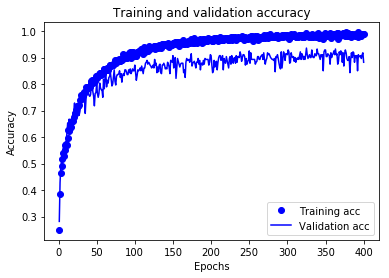

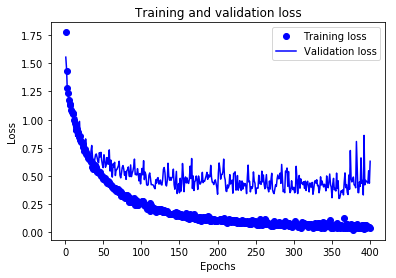

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_3rd Experiment.h5')

In [8]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 2s 63ms/step - loss: 0.4078 - categorical_accuracy: 0.9179
Test-set accuracy: 91.79%


In [9]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [10]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 3s 5ms/sample - loss: 0.4078 - categorical_accuracy: 0.9179
Loss on test set:  0.407756699701505
Accuracy on test set:  0.91785717


In [11]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 2s 4ms/sample
(560, 1)
(560, 1)


<Figure size 3600x2400 with 0 Axes>

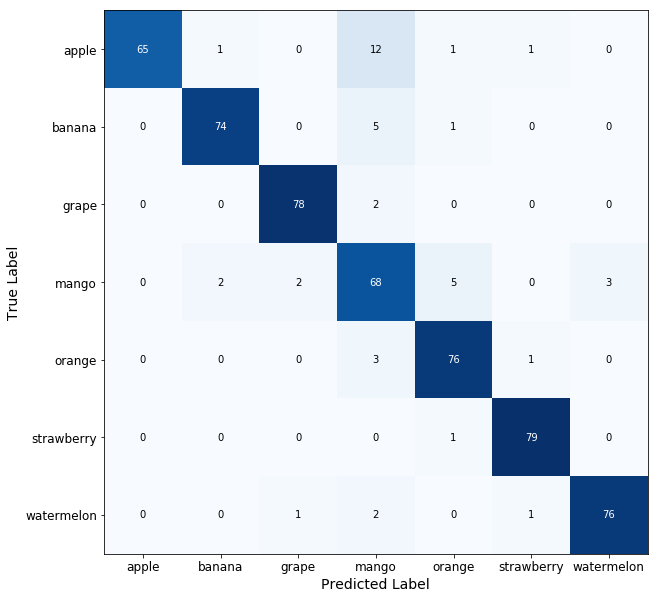

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure(dpi=600)
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.xlabel('Predicted Label',fontsize=14)
plt.ylabel('True Label',fontsize=14)
plt.savefig('IndusNet_7 classes_100_100_3rd Experiment.jpeg',dpi=1200)
plt.show()